# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploring and Preparing Data


**OBJECTIVES**

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


Installed & Imported the following libraries


In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
import requests
import io

## Exploratory Data Analysis


Retrieved the SpaceX dataset into a Pandas dataframe and displayed its summary.


In [4]:
df = pd.read_csv("C:\\Users\\ACER\\OneDrive\\ドキュメント\\Capstone_DataScienceProject\\Data_EDA\\dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. 


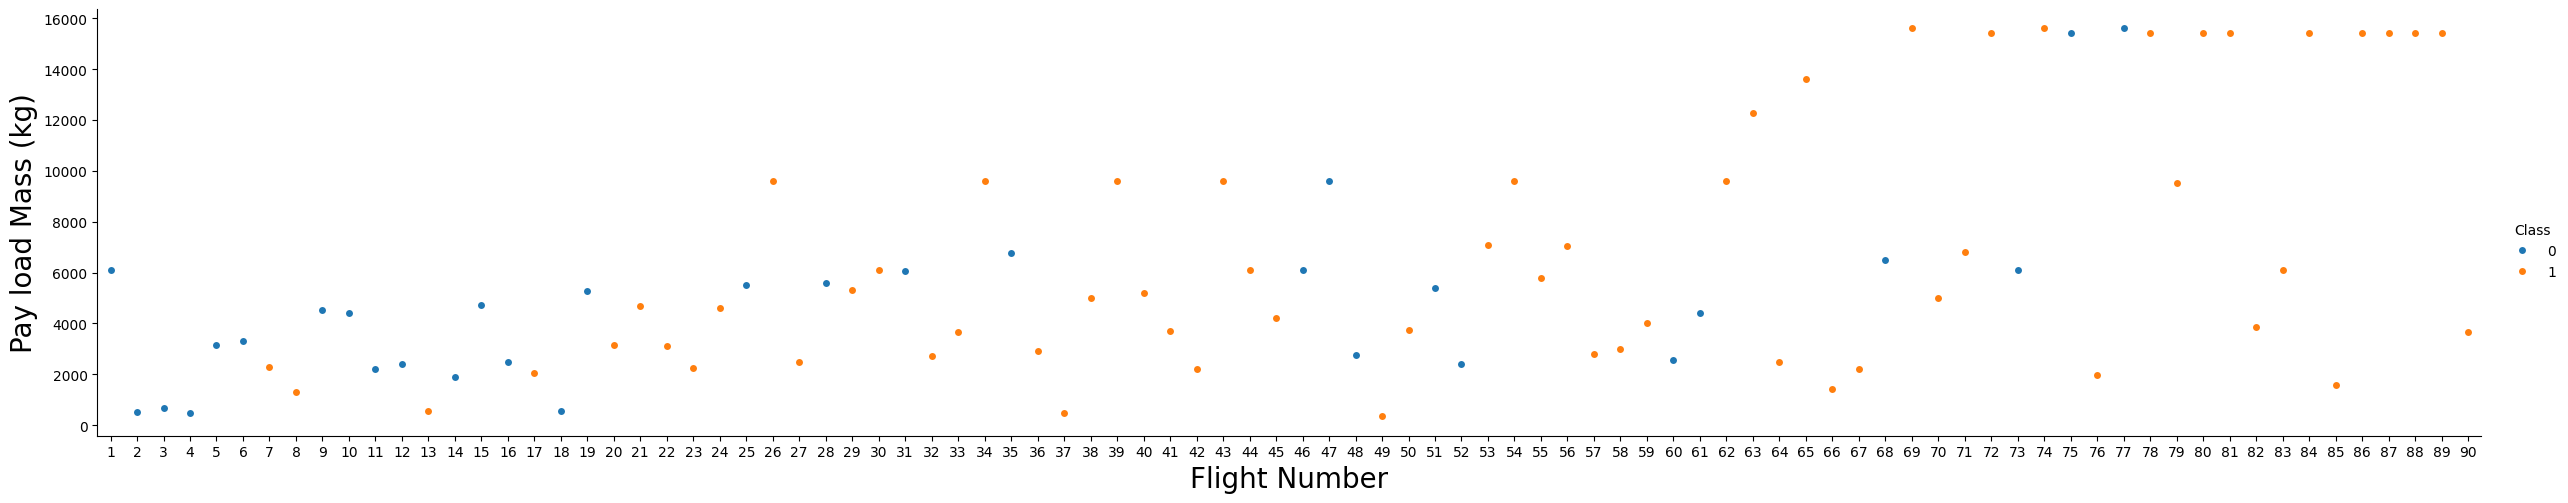

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


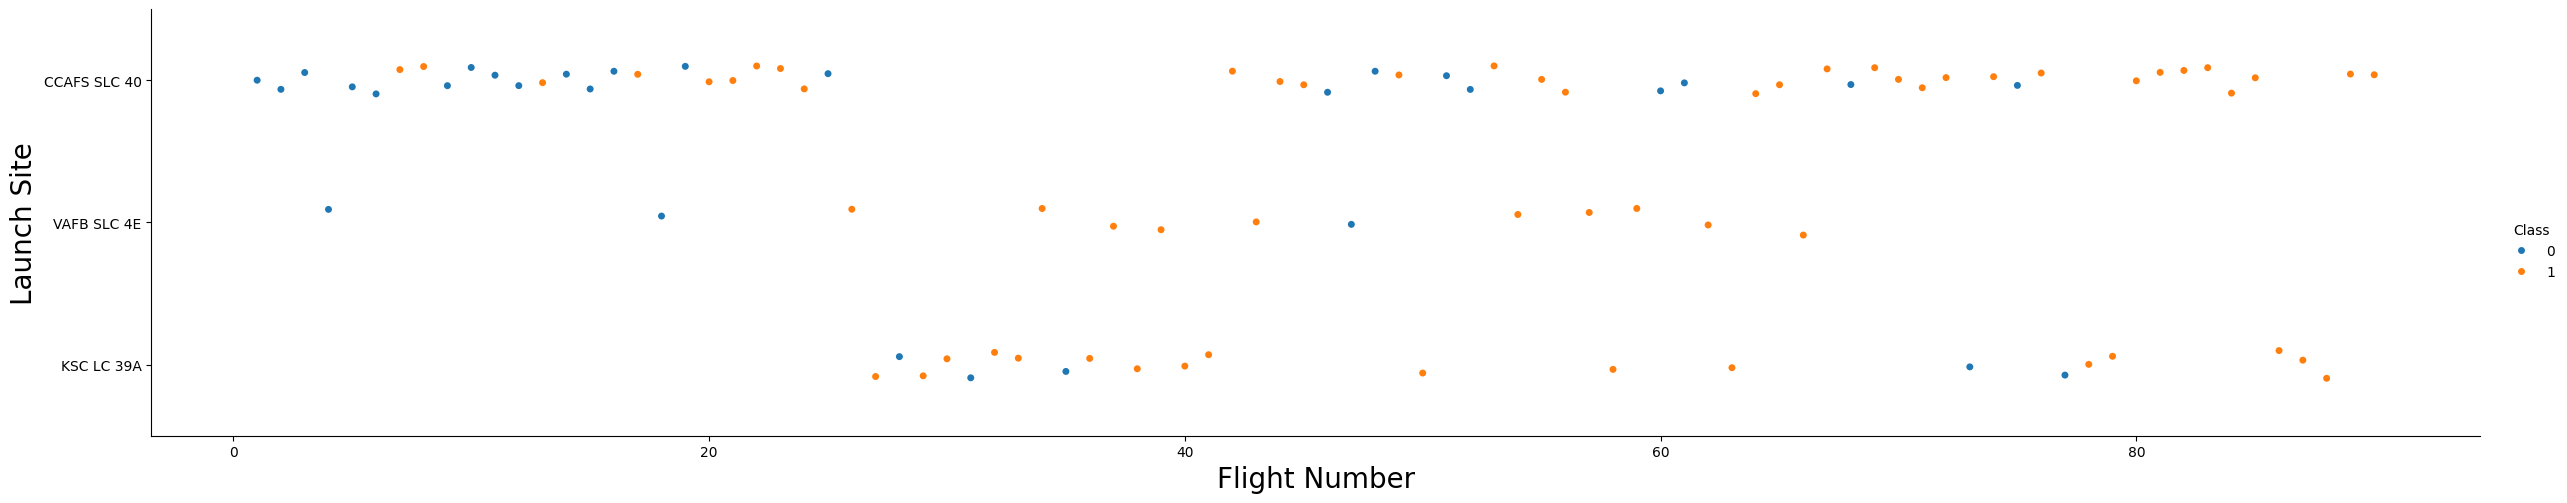

In [5]:
# Plotted a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

**Insights drawn from above graph:**
* CCAFS SLC 40 holds more flight no with better outcomes.
* KSC LC 39A and VAFB has better outcome with increased flight number

### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


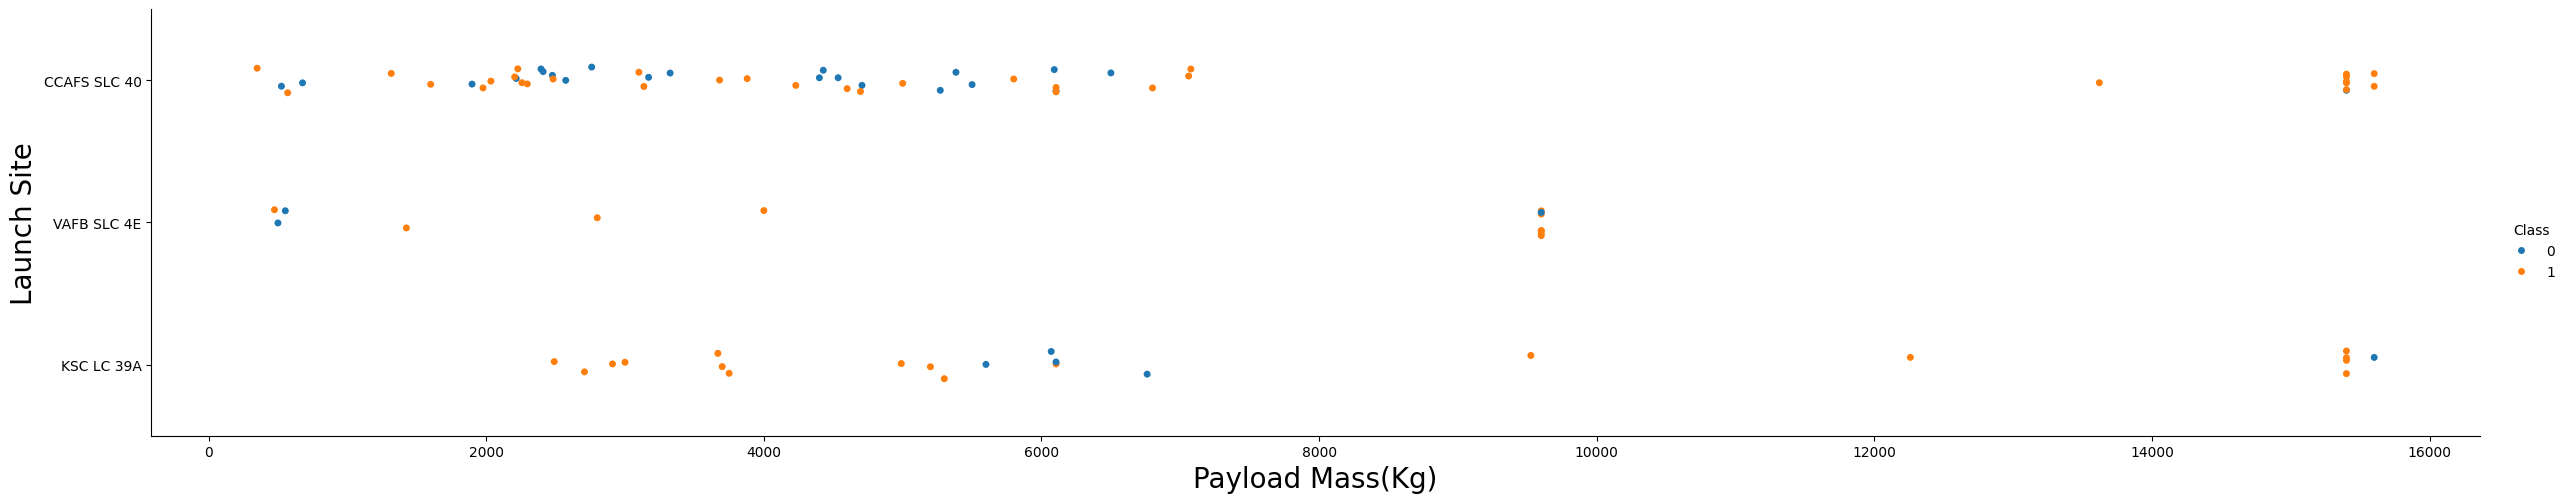

In [26]:
# Plotted a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass(Kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

**Insights drawn from above graph:**
* More successful outcomes with less payload at CCAFS SLC 40.
* Not much launches were made by carrying payload more than 1000.
* No rocket launches were made for payload greater than 1000 at VAFB SLC

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


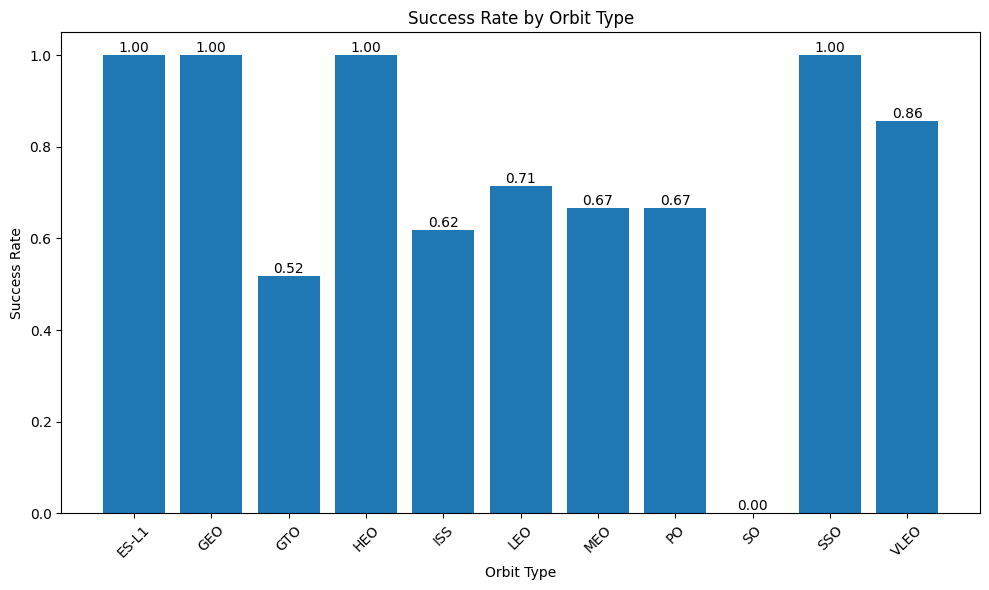

In [8]:
# using groupby method on Orbit column, found the mean of Class column
success_rates = df.groupby('Orbit')['Class'].mean().reset_index()
#changed names of columns of success_rates dataframe
success_rates.columns = ['Orbit Type', 'Success Rate']

# plotted bar graph with this data
plt.figure(figsize=(10, 6))
bars = plt.bar(success_rates['Orbit Type'], success_rates['Success Rate'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}",
             ha='center', va='bottom')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate by Orbit Type')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

**Insights drawn from above graph :**
* ES-L1,HEO,SSO has highest success rate.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


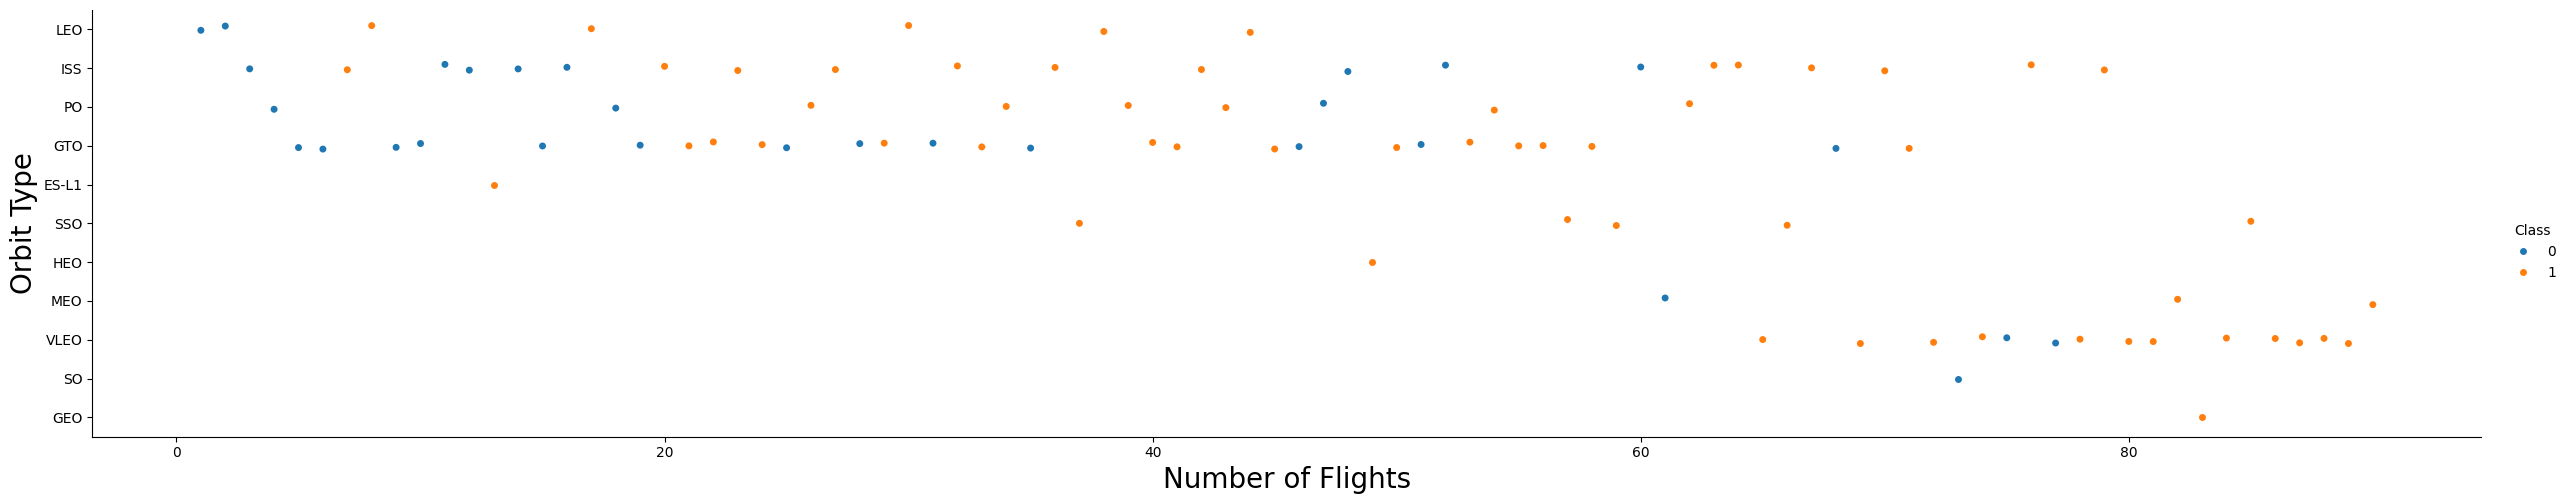

In [9]:
# Plotted a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Number of Flights",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

**Insights drawn from above graph :**
* observed that in the LEO orbit, success seems to be related to the number of flights. 
* in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


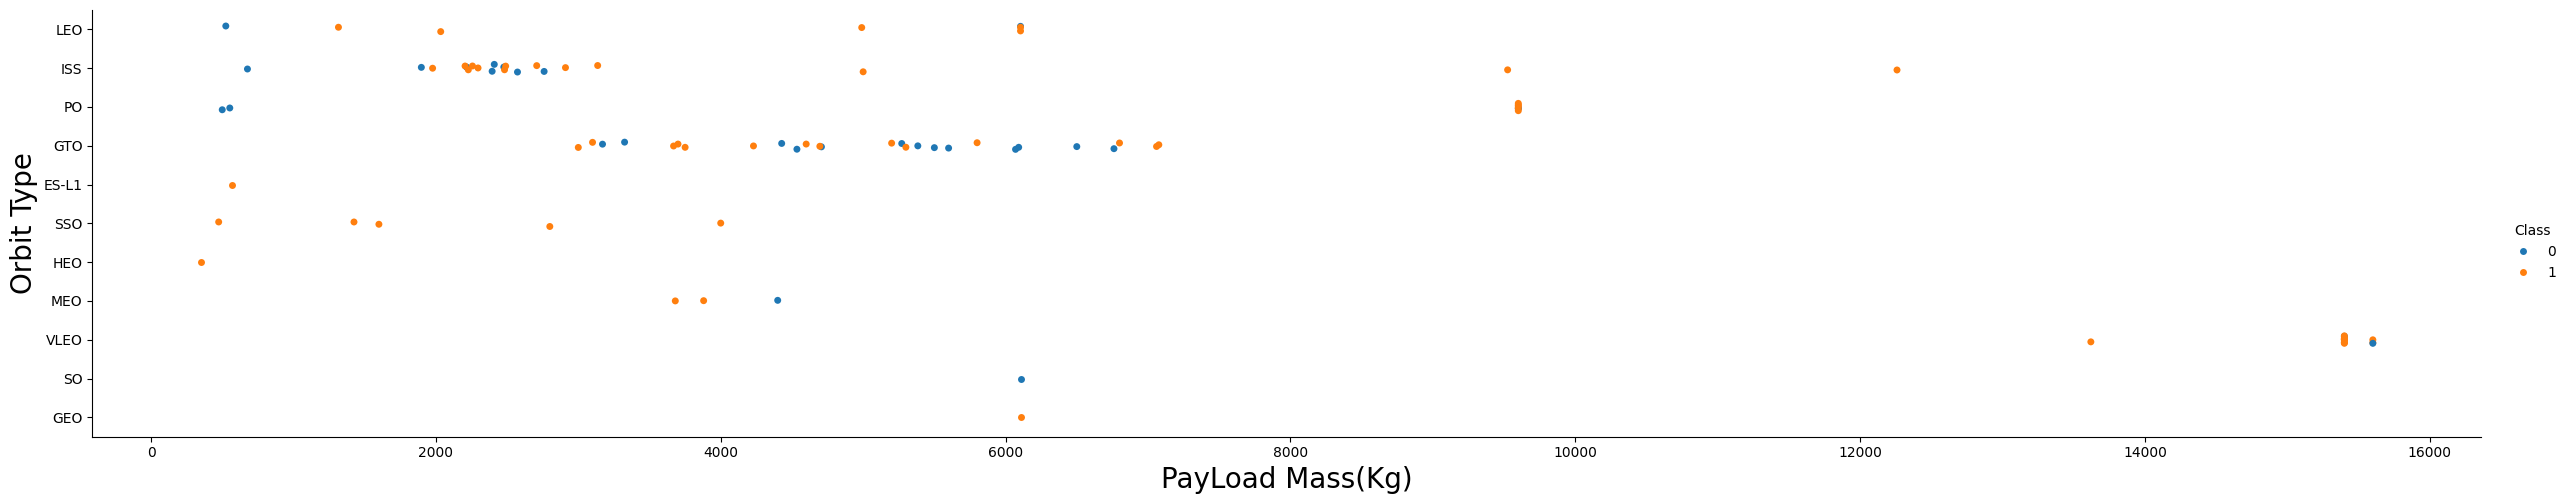

In [10]:
# Plotted a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayLoad Mass(Kg)",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()


**Insights drawn from above graph :**
* With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.
* However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


plotted a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


In [11]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()

# assigned year list to Date column 
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


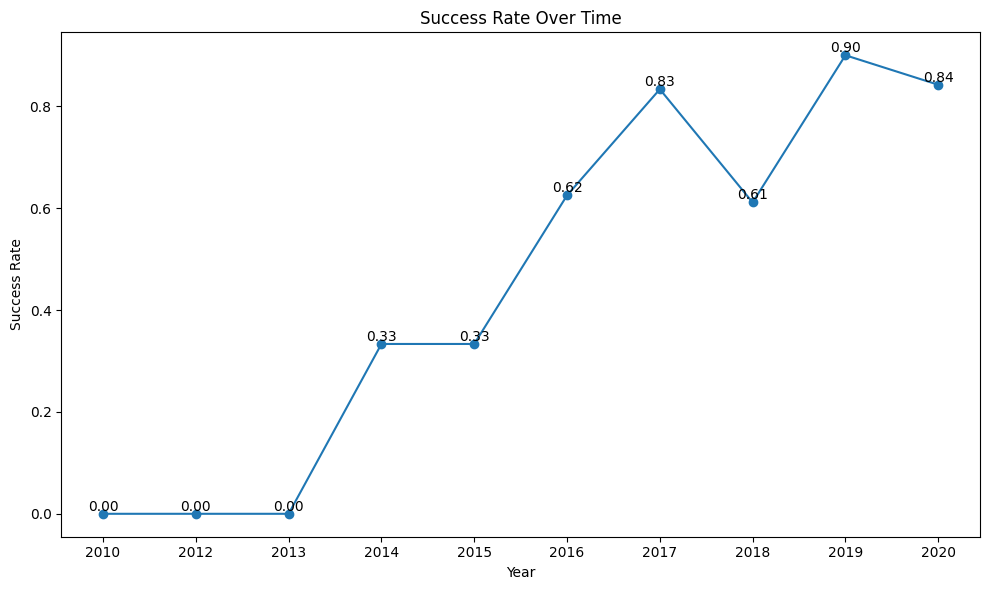

In [12]:
# Plotted a line chart with x axis to be the extracted year and y axis to be the success rate

success_rates = df.groupby('Date')['Class'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(success_rates['Date'], success_rates['Class'], marker='o')

plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Success Rate Over Time')

# Calculated success rate for each year
for i, row in success_rates.iterrows():
    plt.text(row['Date'], row['Class'], f"{row['Class']:.2f}",
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Insights drawn from above graph :**
* observed that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


With obtained preliminary insights about how each important variable would affect the success rate, selected features that could be used in success prediction in the future module.


In [14]:
# selected features are as follows
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Using the function <code>get_dummies</code> and <code>features</code> dataframe applied OneHotEncoder to columns <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assigned the value to the variable <code>features_one_hot</code>, displayed the results using the method head.Result dataframe includes all features including the encoded ones.


In [15]:
# Used get_dummies() function on the categorical columns
df_with_dummies = pd.get_dummies(features[['Orbit','LaunchSite','LandingPad','Serial']])

# Concatenated the original DataFrame with the dummy variables
features_one_hot= pd.concat([features, df_with_dummies], axis=1)
features_one_hot.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, we can now cast the entire dataframe to variable type <code>float64</code>


In [16]:
# used astype function
numeric_columns = features_one_hot.select_dtypes(include=['int64', 'float64']).columns

# Casted numeric columns to float64 and displayed
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

print(features_one_hot.dtypes)
features_one_hot

FlightNumber    float64
PayloadMass     float64
Orbit            object
LaunchSite       object
Flights         float64
                 ...   
Serial_B1056       bool
Serial_B1058       bool
Serial_B1059       bool
Serial_B1060       bool
Serial_B1062       bool
Length: 84, dtype: object


,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,LEO,CCAFS SLC 40,1.0,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2.0,525.000000,LEO,CCAFS SLC 40,1.0,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3.0,677.000000,ISS,CCAFS SLC 40,1.0,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4.0,500.000000,PO,VAFB SLC 4E,1.0,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5.0,3170.000000,GTO,CCAFS SLC 40,1.0,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,VLEO,KSC LC 39A,2.0,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,...,False,False,False,False,False,False,False,False,True,False
86,87.0,15400.000000,VLEO,KSC LC 39A,3.0,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,...,False,False,False,False,False,False,True,False,False,False
87,88.0,15400.000000,VLEO,KSC LC 39A,6.0,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,...,False,False,False,True,False,False,False,False,False,False
88,89.0,15400.000000,VLEO,CCAFS SLC 40,3.0,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,...,False,False,False,False,False,False,False,False,True,False


We can now export it to a <b>CSV</b> for the next section.


In [18]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)